# Information estimation demo
This notebook shows an example of estimating the information content of experimental data, using 
the Berkeley Single Cell Computational Microscopy dataset.

It assumes the code in this repository has already been installed by running `pip install -e .` in the top level directory

## Download the data

In [ ]:
!pip install bsccm

from bsccm import download_dataset

data_path = download_dataset(tiny=True) # Download the tiny, demo version of the dataset

## Load measurements, split them into patches, and estimate information content

In [ ]:
from encoding_information.datasets import BSCCMDataset

dataset = BSCCMDataset(data_path)

# load a 300 x H x W numpy array of 300 images of cells, with intensity counts in units of photons
measurements = dataset.get_measurements(300)


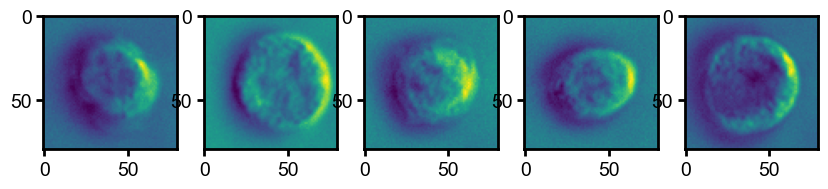

In [ ]:
# show example measurements
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 5, figsize=(10, 2))
for i, a in enumerate(ax):  
    a.imshow(measurements[i])

### Estimate information


In [ ]:
from encoding_information.models import PixelCNN, PoissonNoiseModel
from encoding_information import estimate_information, extract_patches


# Split into training/test sets and extract patches
# Breaking large images into patches increases computational efficiency
# Test set is used to evaluate information estimates
patches = extract_patches(measurements[:-100], patch_size=16)
test_patches = extract_patches(measurements[-100:], patch_size=16) 

# Initialize and fit model to training data
model = PixelCNN()  # Also supports FullGaussianProcess, StationaryGaussianProcess
noise_model = PoissonNoiseModel()
model.fit(patches)

# Estimate information content with confidence bounds
# Error bars are calculated based on test set size
info, lower_bound, upper_bound = estimate_information(
   model, 
   noise_model,
   patches,
   test_patches,
   confidence_interval=0.95
)

print(f"Information: {info:.2f} ± {(upper_bound-lower_bound)/2:.2f} bits/pixel")
